# Data Cleaning and Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

For our data analysis, we will first import and clean the data by person, as well as plot their individual meditation score during their task and test.

## Alina

Alina was assigned the word task/test and their order was No Music --> Classical --> Heavy Metal

In [2]:
df_AL = pd.concat(map(pd.read_csv, ['Alina_C_Task.csv','Alina_HM_Task.csv','Alina_NM_Task.csv','Alina_C_Test.csv','Alina_HM_Test.csv','Alina_NM_Test.csv']),axis =1)


In [3]:
df_AL.columns.values[0] = 'Time'
df_AL.columns.values[4] = 'AL_Task Meditation: C'
df_AL.columns.values[12] = 'AL_Task Meditation: HM'
df_AL.columns.values[20] = 'AL_Task Meditation: NM'
df_AL.columns.values[28] = 'AL_Test Meditation: C'
df_AL.columns.values[36] = 'AL_Test Meditation: HM'
df_AL.columns.values[44] = 'AL_Test Meditation: NM'

In [4]:
df_AL = df_AL[['Time','AL_Task Meditation: C','AL_Task Meditation: HM','AL_Task Meditation: NM','AL_Test Meditation: C','AL_Test Meditation: HM','AL_Test Meditation: NM']]
df_AL

,Time,AL_Task Meditation: C,AL_Task Meditation: HM,AL_Task Meditation: NM,AL_Test Meditation: C,AL_Test Meditation: HM,AL_Test Meditation: NM
0,0.000000,41.0,94.0,50.0,48.0,64.0,81.0
1,0.001953,41.0,94.0,50.0,48.0,64.0,81.0
2,0.003906,41.0,94.0,50.0,48.0,64.0,81.0
3,0.005859,41.0,94.0,50.0,48.0,64.0,81.0
4,0.007812,41.0,94.0,50.0,48.0,64.0,81.0
...,...,...,...,...,...,...,...
55227,107.865234,54.0,NaN,NaN,NaN,NaN,NaN
55228,107.867188,54.0,NaN,NaN,NaN,NaN,NaN
55229,107.869141,54.0,NaN,NaN,NaN,NaN,NaN
55230,107.871094,54.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_AL.describe()

,Time,AL_Task Meditation: C,AL_Task Meditation: HM,AL_Task Meditation: NM,AL_Test Meditation: C,AL_Test Meditation: HM,AL_Test Meditation: NM
count,55232.000000,55232.000000,52288.000000,46624.000000,41696.000000,36192.000000,52288.000000
mean,53.936523,64.264122,54.227834,69.682610,57.842287,10.337754,43.444136
std,31.141112,15.322093,14.514323,14.286718,14.218499,20.218955,39.617913
min,0.000000,16.000000,20.000000,40.000000,8.000000,0.000000,0.000000
25%,26.968262,56.000000,47.000000,61.000000,50.000000,0.000000,0.000000
50%,53.936523,66.000000,54.000000,70.000000,57.000000,0.000000,64.000000
75%,80.904785,75.000000,63.000000,80.000000,67.000000,0.000000,81.000000
max,107.873047,100.000000,94.000000,97.000000,94.000000,64.000000,100.000000


Text(0, 0.5, 'Meditation Score')

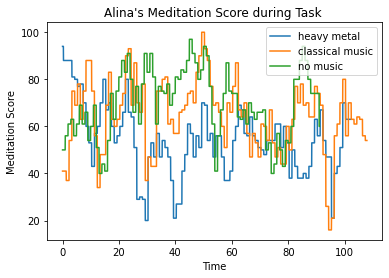

In [6]:
axes_AL_task = plt.gca()
df_AL.plot(kind = 'line', x='Time',y= 'AL_Task Meditation: HM', ax = axes_AL_task, label = 'heavy metal')
df_AL.plot(kind = 'line', x='Time',y= 'AL_Task Meditation: C', ax = axes_AL_task, label = 'classical music')
df_AL.plot(kind = 'line', x='Time',y= 'AL_Task Meditation: NM', ax = axes_AL_task, label = 'no music')
plt.title("Alina's Meditation Score during Task ")
plt.ylabel("Meditation Score")

Text(0, 0.5, 'Meditation Score')

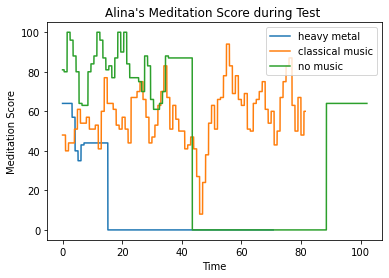

In [7]:
axes_AL_test = plt.gca()
df_AL.plot(kind = 'line', x='Time',y= 'AL_Test Meditation: HM', ax = axes_AL_test, label = 'heavy metal')
df_AL.plot(kind = 'line', x='Time',y= 'AL_Test Meditation: C', ax = axes_AL_test, label = 'classical music')
df_AL.plot(kind = 'line', x='Time',y= 'AL_Test Meditation: NM', ax = axes_AL_test, label = 'no music')
plt.title("Alina's Meditation Score during Test ")
plt.ylabel("Meditation Score")

## Andrea

Andrea was assigned the image task/test and their order was No Music --> Classical --> Heavy Metal

In [8]:
df_AN = pd.concat(map(pd.read_csv, ['Andrea_C_Task.csv','Andrea_HM_Task.csv','Andrea_C_Test.csv','Andrea_HM_Test.csv','Andrea_NM_Test.csv']),axis =1)


In [9]:
df_AN.columns.values[0] = 'Time'
df_AN.columns.values[4] = 'AN_Task Meditation: C'
df_AN.columns.values[11] = 'AN_Task Meditation: HM'
#note: Andrea's no music task data was not included due to an error in data collection
df_AN.columns.values[20] = 'AN_Test Meditation: C'
df_AN.columns.values[28] = 'AN_Test Meditation: HM'
df_AN.columns.values[36] = 'AN_Test Meditation: NM'
df_AN = df_AN[['Time','AN_Task Meditation: C','AN_Task Meditation: HM','AN_Test Meditation: C','AN_Test Meditation: HM','AN_Test Meditation: NM']]
df_AN

,Time,AN_Task Meditation: C,AN_Task Meditation: HM,AN_Test Meditation: C,AN_Test Meditation: HM,AN_Test Meditation: NM
0,0.000000,40.0,61.0,61.0,7.0,14.0
1,0.001953,40.0,61.0,61.0,7.0,14.0
2,0.003906,40.0,61.0,61.0,7.0,14.0
3,0.005859,40.0,61.0,61.0,7.0,14.0
4,0.007812,40.0,61.0,61.0,7.0,14.0
...,...,...,...,...,...,...
54299,NaN,NaN,NaN,NaN,66.0,NaN
54300,NaN,NaN,NaN,NaN,66.0,NaN
54301,NaN,NaN,NaN,NaN,66.0,NaN
54302,NaN,NaN,NaN,NaN,66.0,NaN


In [10]:
df_AN.describe()

,Time,AN_Task Meditation: C,AN_Task Meditation: HM,AN_Test Meditation: C,AN_Test Meditation: HM,AN_Test Meditation: NM
count,23488.000000,23488.000000,8800.000000,4288.000000,54304.000000,34912.000000
mean,22.936523,42.814586,49.662045,29.639925,50.200114,34.799181
std,13.243254,20.783634,10.286867,19.814854,16.855975,10.764593
min,0.000000,3.000000,38.000000,1.000000,1.000000,8.000000
25%,11.468262,29.000000,43.000000,16.000000,41.000000,27.000000
50%,22.936523,40.000000,48.000000,26.000000,51.000000,37.000000
75%,34.404785,54.000000,56.000000,41.000000,61.000000,41.000000
max,45.873047,94.000000,77.000000,64.000000,84.000000,61.000000


Text(0, 0.5, 'Meditation Score')

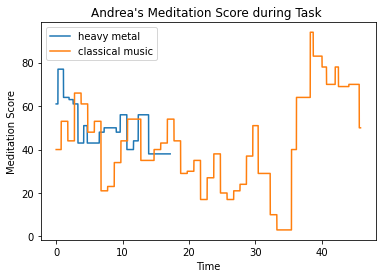

In [11]:
axes_AN_task = plt.gca()
df_AN.plot(kind = 'line', x='Time',y= 'AN_Task Meditation: HM', ax = axes_AN_task, label = 'heavy metal')
df_AN.plot(kind = 'line', x='Time',y= 'AN_Task Meditation: C', ax = axes_AN_task, label = 'classical music')
plt.title("Andrea's Meditation Score during Task ")
plt.ylabel("Meditation Score")

Text(0, 0.5, 'Meditation Score')

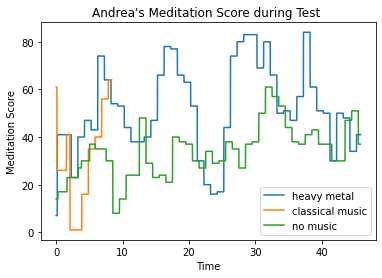

In [12]:
axes_AN_test = plt.gca()
df_AN.plot(kind = 'line', x='Time',y= 'AN_Test Meditation: HM', ax = axes_AN_test, label = 'heavy metal')
df_AN.plot(kind = 'line', x='Time',y= 'AN_Test Meditation: C', ax = axes_AN_test, label = 'classical music')
df_AN.plot(kind = 'line', x='Time',y= 'AN_Test Meditation: NM', ax = axes_AN_test, label = 'no music')
plt.title("Andrea's Meditation Score during Test ")
plt.ylabel("Meditation Score")

## Blake

Blake was assigned the image task/test and their order was No Music --> Classical --> Heavy Metal

In [13]:
df_B = pd.concat(map(pd.read_csv, ['Blake_C_Task.csv','Blake_HM_Task.csv','Blake_NM_Task.csv','Blake_C_Test.csv','Blake_HM_Test.csv','Blake_NM_Test.csv']),axis =1)

In [14]:
df_B.columns.values[0] = 'Time'
df_B.columns.values[4] = 'B_Task Meditation: C'
df_B.columns.values[12] = 'B_Task Meditation: HM'
df_B.columns.values[20] = 'B_Task Meditation: NM'
df_B.columns.values[28] = 'B_Test Meditation: C'
df_B.columns.values[36] = 'B_Test Meditation: HM'
df_B.columns.values[44] = 'B_Test Meditation: NM'
df_B = df_B[['Time','B_Task Meditation: C','B_Task Meditation: HM','B_Task Meditation: NM','B_Test Meditation: C','B_Test Meditation: HM','B_Test Meditation: NM']]
df_B

,Time,B_Task Meditation: C,B_Task Meditation: HM,B_Task Meditation: NM,B_Test Meditation: C,B_Test Meditation: HM,B_Test Meditation: NM
0,0.000000,90.0,43.0,29.0,90.0,61.0,54.0
1,0.001953,90.0,43.0,29.0,90.0,61.0,54.0
2,0.003906,90.0,43.0,29.0,90.0,61.0,54.0
3,0.005859,90.0,43.0,29.0,90.0,61.0,54.0
4,0.007812,90.0,43.0,29.0,90.0,61.0,54.0
...,...,...,...,...,...,...,...
109787,214.427734,50.0,NaN,NaN,NaN,NaN,NaN
109788,214.429688,50.0,NaN,NaN,NaN,NaN,NaN
109789,214.431641,50.0,NaN,NaN,NaN,NaN,NaN
109790,214.433594,50.0,NaN,NaN,NaN,NaN,NaN


In [15]:
df_B.describe()

,Time,B_Task Meditation: C,B_Task Meditation: HM,B_Task Meditation: NM,B_Test Meditation: C,B_Test Meditation: HM,B_Test Meditation: NM
count,109792.000000,109792.000000,45664.000000,64640.000000,45376.000000,40480.000000,53760.000000
mean,107.217773,50.763480,58.400184,68.619957,57.097452,40.494343,54.642820
std,61.903056,15.965461,15.369790,16.907847,14.745284,31.677323,12.791508
min,0.000000,3.000000,29.000000,29.000000,24.000000,0.000000,11.000000
25%,53.608887,40.000000,48.000000,56.000000,44.000000,0.000000,50.000000
50%,107.217773,51.000000,54.000000,69.000000,56.000000,53.000000,54.000000
75%,160.826660,63.000000,64.000000,83.000000,69.000000,61.000000,63.000000
max,214.435547,100.000000,100.000000,100.000000,90.000000,100.000000,87.000000


Text(0, 0.5, 'Meditation Score')

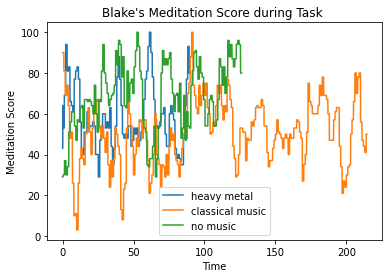

In [16]:
axes_B_task = plt.gca()
df_B.plot(kind = 'line', x='Time',y= 'B_Task Meditation: HM', ax = axes_B_task, label = 'heavy metal')
df_B.plot(kind = 'line', x='Time',y= 'B_Task Meditation: C', ax = axes_B_task, label = 'classical music')
df_B.plot(kind = 'line', x='Time',y= 'B_Task Meditation: NM', ax = axes_B_task, label = 'no music')
plt.title("Blake's Meditation Score during Task ")
plt.ylabel("Meditation Score")

Text(0, 0.5, 'Meditation Score')

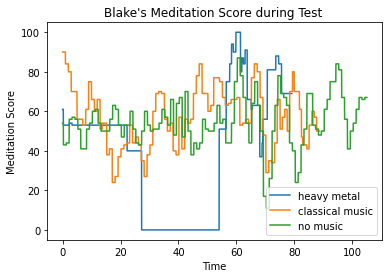

In [17]:
axes_B_test = plt.gca()
df_B.plot(kind = 'line', x='Time',y= 'B_Test Meditation: HM', ax = axes_B_test, label = 'heavy metal')
df_B.plot(kind = 'line', x='Time',y= 'B_Test Meditation: C', ax = axes_B_test, label = 'classical music')
df_B.plot(kind = 'line', x='Time',y= 'B_Test Meditation: NM', ax = axes_B_test, label = 'no music')
plt.title("Blake's Meditation Score during Test ")
plt.ylabel("Meditation Score")

## George

George was assigned the image task/test and their order was No Music --> Heavy Metal --> Classical

In [18]:
df_G = pd.concat(map(pd.read_csv, ['George_HM_Task.csv','George_C_Task.csv','George_NM_Task.csv','George_HM_Test.csv','George_C_Test.csv','George_NM_Test.csv']),axis =1)

In [19]:
df_G.columns.values[0] = 'Time'
df_G.columns.values[4] = 'G_Task Meditation: HM'
df_G.columns.values[12] = 'G_Task Meditation: C'
df_G.columns.values[20] = 'G_Task Meditation: NM'
df_G.columns.values[28] = 'G_Test Meditation: HM'
df_G.columns.values[36] = 'G_Test Meditation: C'
df_G.columns.values[44] = 'G_Test Meditation: NM'
df_G = df_G[['Time','G_Task Meditation: HM','G_Task Meditation: C','G_Task Meditation: NM','G_Test Meditation: HM','G_Test Meditation: C','G_Test Meditation: NM']]
df_G

,Time,G_Task Meditation: HM,G_Task Meditation: C,G_Task Meditation: NM,G_Test Meditation: HM,G_Test Meditation: C,G_Test Meditation: NM
0,0.000000,27.0,23.0,44.0,47.0,66.0,40.0
1,0.001953,27.0,23.0,44.0,47.0,66.0,40.0
2,0.003906,27.0,23.0,44.0,47.0,66.0,40.0
3,0.005859,27.0,23.0,44.0,47.0,66.0,40.0
4,0.007812,27.0,23.0,44.0,47.0,66.0,40.0
...,...,...,...,...,...,...,...
78491,NaN,NaN,NaN,NaN,44.0,NaN,NaN
78492,NaN,NaN,NaN,NaN,44.0,NaN,NaN
78493,NaN,NaN,NaN,NaN,44.0,NaN,NaN
78494,NaN,NaN,NaN,NaN,44.0,NaN,NaN


In [20]:
df_G.describe()

,Time,G_Task Meditation: HM,G_Task Meditation: C,G_Task Meditation: NM,G_Test Meditation: HM,G_Test Meditation: C,G_Test Meditation: NM
count,50432.000000,50432.000000,58624.000000,46176.000000,78496.000000,62720.000000,55264.000000
mean,49.249023,20.403970,41.405636,42.920998,36.611815,55.502041,58.575565
std,28.434783,11.838013,11.964194,24.155497,19.057961,15.612423,12.809346
min,0.000000,1.000000,13.000000,1.000000,0.000000,16.000000,27.000000
25%,24.624512,11.000000,35.000000,26.000000,26.000000,47.000000,50.000000
50%,49.249023,20.000000,43.000000,38.000000,37.000000,60.000000,57.000000
75%,73.873535,29.000000,48.000000,61.000000,50.000000,69.000000,69.000000
max,98.498047,51.000000,66.000000,100.000000,90.000000,84.000000,80.000000


Text(0, 0.5, 'Meditation Score')

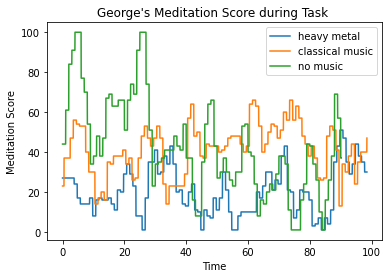

In [21]:
axes_G_task = plt.gca()
df_G.plot(kind = 'line', x='Time',y= 'G_Task Meditation: HM', ax = axes_G_task, label = 'heavy metal')
df_G.plot(kind = 'line', x='Time',y= 'G_Task Meditation: C', ax = axes_G_task, label = 'classical music')
df_G.plot(kind = 'line', x='Time',y= 'G_Task Meditation: NM', ax = axes_G_task, label = 'no music')
plt.title("George's Meditation Score during Task ")
plt.ylabel("Meditation Score")

Text(0, 0.5, 'Meditation Score')

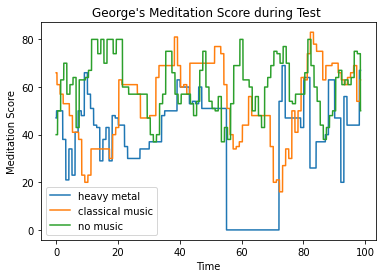

In [22]:
axes_G_test = plt.gca()
df_G.plot(kind = 'line', x='Time',y= 'G_Test Meditation: HM', ax = axes_G_test, label = 'heavy metal')
df_G.plot(kind = 'line', x='Time',y= 'G_Test Meditation: C', ax = axes_G_test, label = 'classical music')
df_G.plot(kind = 'line', x='Time',y= 'G_Test Meditation: NM', ax = axes_G_test, label = 'no music')
plt.title("George's Meditation Score during Test ")
plt.ylabel("Meditation Score")

## Kassie

Kassie was assigned the word task/test and their order was No Music --> Heavy Metal --> Classical

In [23]:
df_K = pd.concat(map(pd.read_csv, ['Kassie_HM_Task.csv','Kassie_C_Task.csv','Kassie_NM_Task.csv','Kassie_HM_Test.csv','Kassie_C_Test.csv','Kassie_NM_Test.csv']),axis =1)

In [24]:
df_K.columns.values[0] = 'Time'
df_K.columns.values[4] = 'K_Task Meditation: HM'
df_K.columns.values[12] = 'K_Task Meditation: C'
df_K.columns.values[20] = 'K_Task Meditation: NM'
df_K.columns.values[28] = 'K_Test Meditation: HM'
df_K.columns.values[36] = 'K_Test Meditation: C'
df_K.columns.values[44] = 'K_Test Meditation: NM'


In [25]:
df_K = df_K[['Time','K_Task Meditation: HM','K_Task Meditation: C','K_Task Meditation: NM','K_Test Meditation: HM','K_Test Meditation: C','K_Test Meditation: NM']]
df_K

,Time,K_Task Meditation: HM,K_Task Meditation: C,K_Task Meditation: NM,K_Test Meditation: HM,K_Test Meditation: C,K_Test Meditation: NM
0,0.000000,24.0,40.0,56.0,56.0,57.0,63.0
1,0.001953,24.0,40.0,56.0,56.0,57.0,63.0
2,0.003906,24.0,40.0,56.0,56.0,57.0,63.0
3,0.005859,24.0,40.0,56.0,56.0,57.0,63.0
4,0.007812,24.0,40.0,56.0,56.0,57.0,63.0
...,...,...,...,...,...,...,...
57915,NaN,NaN,20.0,NaN,NaN,NaN,NaN
57916,NaN,NaN,20.0,NaN,NaN,NaN,NaN
57917,NaN,NaN,20.0,NaN,NaN,NaN,NaN
57918,NaN,NaN,20.0,NaN,NaN,NaN,NaN


In [26]:
df_K.describe()

,Time,K_Task Meditation: HM,K_Task Meditation: C,K_Task Meditation: NM,K_Test Meditation: HM,K_Test Meditation: C,K_Test Meditation: NM
count,51968.000000,51968.000000,57920.000000,48864.000000,38784.000000,45056.000000,44352.000000
mean,50.749023,48.207647,50.646547,38.866364,55.999845,50.177135,40.222763
std,29.300808,19.304914,15.719944,18.166787,11.475625,13.901307,13.027119
min,0.000000,3.000000,17.000000,1.000000,30.000000,21.000000,1.000000
25%,25.374512,35.000000,40.000000,26.000000,50.000000,40.000000,30.000000
50%,50.749023,48.000000,50.000000,38.000000,53.000000,48.000000,40.000000
75%,76.123535,60.000000,61.000000,53.000000,64.000000,61.500000,50.000000
max,101.498047,100.000000,88.000000,80.000000,87.000000,80.000000,63.000000


Text(0, 0.5, 'Meditation Score')

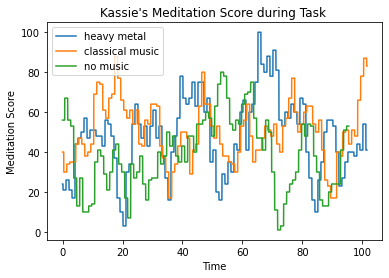

In [27]:
axes_K_task = plt.gca()
df_K.plot(kind = 'line', x='Time',y= 'K_Task Meditation: HM', ax = axes_K_task, label = 'heavy metal')
df_K.plot(kind = 'line', x='Time',y= 'K_Task Meditation: C', ax = axes_K_task, label = 'classical music')
df_K.plot(kind = 'line', x='Time',y= 'K_Task Meditation: NM', ax = axes_K_task, label = 'no music')
plt.title("Kassie's Meditation Score during Task ")
plt.ylabel("Meditation Score")

Text(0, 0.5, 'Meditation Score')

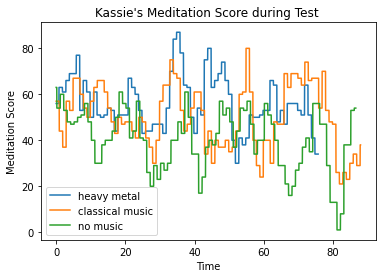

In [28]:
axes_K_test = plt.gca()
df_K.plot(kind = 'line', x='Time',y= 'K_Test Meditation: HM', ax = axes_K_test, label = 'heavy metal')
df_K.plot(kind = 'line', x='Time',y= 'K_Test Meditation: C', ax = axes_K_test, label = 'classical music')
df_K.plot(kind = 'line', x='Time',y= 'K_Test Meditation: NM', ax = axes_K_test, label = 'no music')
plt.title("Kassie's Meditation Score during Test ")
plt.ylabel("Meditation Score")

## Manny

Manny was assigned the word task/test and their order was No Music --> Classical --> Heavy Metal

In [29]:
df_M = pd.concat(map(pd.read_csv, ['Manny_C_Task.csv','Manny_HM_Task.csv','Manny_NM_Task.csv','Manny_C_Test.csv','Manny_HM_Test.csv','Manny_NM_Test.csv']),axis =1)

In [30]:
df_M.columns.values[0] = 'Time'
df_M.columns.values[4] = 'M_Task Meditation: C'
df_M.columns.values[12] = 'M_Task Meditation: HM'
df_M.columns.values[20] = 'M_Task Meditation: NM'
df_M.columns.values[28] = 'M_Test Meditation: C'
df_M.columns.values[36] = 'M_Test Meditation: HM'
df_M.columns.values[44] = 'M_Test Meditation: NM'
df_M = df_M[['Time','M_Task Meditation: C','M_Task Meditation: HM','M_Task Meditation: NM','M_Test Meditation: C','M_Test Meditation: HM','M_Test Meditation: NM']]
df_M

,Time,M_Task Meditation: C,M_Task Meditation: HM,M_Task Meditation: NM,M_Test Meditation: C,M_Test Meditation: HM,M_Test Meditation: NM
0,0.000000,40.0,41.0,77.0,54.0,53.0,38.0
1,0.001953,40.0,41.0,77.0,54.0,53.0,38.0
2,0.003906,40.0,41.0,77.0,54.0,53.0,38.0
3,0.005859,40.0,41.0,77.0,54.0,53.0,38.0
4,0.007812,40.0,41.0,77.0,54.0,53.0,38.0
...,...,...,...,...,...,...,...
127003,NaN,NaN,NaN,NaN,NaN,NaN,61.0
127004,NaN,NaN,NaN,NaN,NaN,NaN,61.0
127005,NaN,NaN,NaN,NaN,NaN,NaN,61.0
127006,NaN,NaN,NaN,NaN,NaN,NaN,61.0


In [31]:
df_M.describe()

,Time,M_Task Meditation: C,M_Task Meditation: HM,M_Task Meditation: NM,M_Test Meditation: C,M_Test Meditation: HM,M_Test Meditation: NM
count,56448.000000,56448.000000,48512.000000,83424.000000,42592.000000,51328.000000,127008.000000
mean,55.124023,69.356434,51.912846,46.769179,49.511575,58.855362,56.666139
std,31.826715,18.228434,14.173585,12.424280,10.709761,13.179839,14.970375
min,0.000000,13.000000,17.000000,13.000000,17.000000,17.000000,14.000000
25%,27.562012,60.000000,44.000000,38.000000,41.000000,53.000000,48.000000
50%,55.124023,74.000000,53.000000,47.000000,50.000000,61.000000,57.000000
75%,82.686035,81.000000,61.000000,54.000000,57.000000,67.000000,66.000000
max,110.248047,100.000000,90.000000,81.000000,74.000000,81.000000,87.000000


Text(0, 0.5, 'Meditation Score')

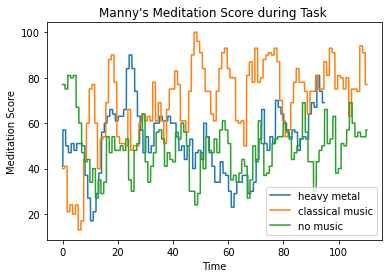

In [32]:
axes_M_task = plt.gca()
df_M.plot(kind = 'line', x='Time',y= 'M_Task Meditation: HM', ax = axes_M_task, label = 'heavy metal')
df_M.plot(kind = 'line', x='Time',y= 'M_Task Meditation: C', ax = axes_M_task, label = 'classical music')
df_M.plot(kind = 'line', x='Time',y= 'M_Task Meditation: NM', ax = axes_M_task, label = 'no music')
plt.title("Manny's Meditation Score during Task ")
plt.ylabel("Meditation Score")

Text(0, 0.5, 'Meditation Score')

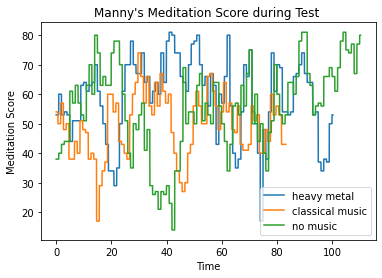

In [33]:
axes_M_test = plt.gca()
df_M.plot(kind = 'line', x='Time',y= 'M_Test Meditation: HM', ax = axes_M_test, label = 'heavy metal')
df_M.plot(kind = 'line', x='Time',y= 'M_Test Meditation: C', ax = axes_M_test, label = 'classical music')
df_M.plot(kind = 'line', x='Time',y= 'M_Test Meditation: NM', ax = axes_M_test, label = 'no music')
plt.title("Manny's Meditation Score during Test ")
plt.ylabel("Meditation Score")

## Rachel

Rachel was assigned the image task/test and their order was No Music --> Heavy Metal --> Classical

In [34]:
df_RL = pd.concat(map(pd.read_csv, ['Rachel_HM_Task.csv','Rachel_C_Task.csv','Rachel_NM_Task.csv','Rachel_HM_Test.csv','Rachel_C_Test.csv','Rachel_NM_Test.csv']),axis =1)

In [35]:
df_RL.columns.values[0] = 'Time'
df_RL.columns.values[4] = 'RL_Task Meditation: HM'
df_RL.columns.values[9] = 'RL_Task Meditation: C'
df_RL.columns.values[17] = 'RL_Task Meditation: NM'
df_RL.columns.values[25] = 'RL_Test Meditation: HM'
df_RL.columns.values[33] = 'RL_Test Meditation: C'
df_RL.columns.values[41] = 'RL_Test Meditation: NM'
df_RL = df_RL[['Time','RL_Task Meditation: HM','RL_Task Meditation: C','RL_Task Meditation: NM','RL_Test Meditation: HM','RL_Test Meditation: C','RL_Test Meditation: NM']]
df_RL

,Time,RL_Task Meditation: HM,RL_Task Meditation: C,RL_Task Meditation: NM,RL_Test Meditation: HM,RL_Test Meditation: C,RL_Test Meditation: NM
0,0.000000,23.0,40.0,91.0,41.0,29.0,37.0
1,0.001953,23.0,40.0,91.0,41.0,29.0,37.0
2,0.003906,23.0,40.0,91.0,41.0,29.0,37.0
3,0.005859,23.0,40.0,91.0,41.0,29.0,37.0
4,0.007812,23.0,40.0,91.0,41.0,29.0,37.0
...,...,...,...,...,...,...,...
65243,NaN,NaN,NaN,10.0,NaN,NaN,NaN
65244,NaN,NaN,NaN,10.0,NaN,NaN,NaN
65245,NaN,NaN,NaN,10.0,NaN,NaN,NaN
65246,NaN,NaN,NaN,10.0,NaN,NaN,NaN


In [36]:
df_RL.describe()

,Time,RL_Task Meditation: HM,RL_Task Meditation: C,RL_Task Meditation: NM,RL_Test Meditation: HM,RL_Test Meditation: C,RL_Test Meditation: NM
count,54662.000000,54662.000000,57408.000000,65248.000000,47776.000000,37344.000000,38304.000000
mean,53.379883,33.333358,44.246516,51.664296,43.341762,39.807707,65.003342
std,30.819735,14.359833,10.599794,16.888792,9.525205,12.918404,9.929537
min,0.000000,1.000000,11.000000,8.000000,17.000000,4.000000,37.000000
25%,26.689941,21.000000,38.000000,40.000000,40.000000,34.000000,57.000000
50%,53.379883,34.000000,44.000000,53.000000,43.000000,40.000000,67.000000
75%,80.069824,44.000000,51.000000,63.000000,50.000000,48.000000,70.000000
max,106.759766,64.000000,67.000000,100.000000,61.000000,67.000000,84.000000


Text(0, 0.5, 'Meditation Score')

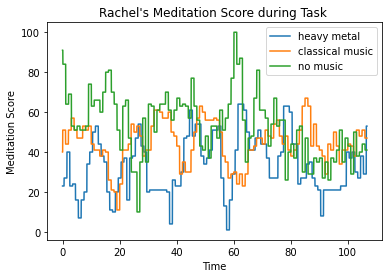

In [37]:
axes_RL_task = plt.gca()
df_RL.plot(kind = 'line', x='Time',y= 'RL_Task Meditation: HM', ax = axes_RL_task, label = 'heavy metal')
df_RL.plot(kind = 'line', x='Time',y= 'RL_Task Meditation: C', ax = axes_RL_task, label = 'classical music')
df_RL.plot(kind = 'line', x='Time',y= 'RL_Task Meditation: NM', ax = axes_RL_task, label = 'no music')
plt.title("Rachel's Meditation Score during Task ")
plt.ylabel("Meditation Score")

Text(0, 0.5, 'Meditation Score')

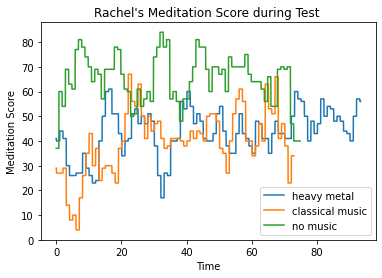

In [38]:
axes_RL_test = plt.gca()
df_RL.plot(kind = 'line', x='Time',y= 'RL_Test Meditation: HM', ax = axes_RL_test, label = 'heavy metal')
df_RL.plot(kind = 'line', x='Time',y=  'RL_Test Meditation: C', ax = axes_RL_test, label = 'classical music')
df_RL.plot(kind = 'line', x='Time',y= 'RL_Test Meditation: NM', ax = axes_RL_test, label = 'no music')
plt.title("Rachel's Meditation Score during Test ")
plt.ylabel("Meditation Score")

## Raunit

Raunit was assigned the word task/test and their order was No Music --> Heavy Metal --> Classical

In [39]:
df_R = pd.concat(map(pd.read_csv, ['Raunit_HM_Task.csv','Raunit_C_Task.csv','Raunit_NM_Task.csv','Raunit_HM_Test.csv','Raunit_C_Test.csv','Raunit_NM_Test.csv']),axis =1)

In [40]:
df_R.columns.values[0] = 'Time'
df_R.columns.values[4] = 'R_Task Meditation: HM'
df_R.columns.values[12] = 'R_Task Meditation: C'
df_R.columns.values[20] = 'R_Task Meditation: NM'
df_R.columns.values[28] = 'R_Test Meditation: HM'
df_R.columns.values[36] = 'R_Test Meditation: C'
df_R.columns.values[44] = 'R_Test Meditation: NM'

In [41]:
df_R = df_R[['Time','R_Task Meditation: HM','R_Task Meditation: C','R_Task Meditation: NM','R_Test Meditation: HM','R_Test Meditation: C','R_Test Meditation: NM']]
df_R

,Time,R_Task Meditation: HM,R_Task Meditation: C,R_Task Meditation: NM,R_Test Meditation: HM,R_Test Meditation: C,R_Test Meditation: NM
0,0.000000,77.0,70.0,70.0,48.0,60.0,57.0
1,0.001953,77.0,70.0,70.0,48.0,60.0,57.0
2,0.003906,77.0,70.0,70.0,48.0,60.0,57.0
3,0.005859,77.0,70.0,70.0,48.0,60.0,57.0
4,0.007812,77.0,70.0,70.0,48.0,60.0,57.0
...,...,...,...,...,...,...,...
57051,NaN,NaN,NaN,40.0,NaN,NaN,NaN
57052,NaN,NaN,NaN,40.0,NaN,NaN,NaN
57053,NaN,NaN,NaN,40.0,NaN,NaN,NaN
57054,NaN,NaN,NaN,40.0,NaN,NaN,NaN


In [42]:
df_R.describe()

,Time,R_Task Meditation: HM,R_Task Meditation: C,R_Task Meditation: NM,R_Test Meditation: HM,R_Test Meditation: C,R_Test Meditation: NM
count,54752.000000,54752.000000,48672.000000,57056.000000,46432.000000,40704.000000,52224.000000
mean,53.467773,49.950321,50.199108,55.413208,50.041351,43.982410,57.587489
std,30.870479,11.495760,14.252693,16.697085,10.562635,13.801919,11.264022
min,0.000000,23.000000,8.000000,1.000000,24.000000,7.000000,30.000000
25%,26.733887,41.000000,40.000000,44.000000,44.000000,37.000000,50.000000
50%,53.467773,51.000000,51.000000,56.000000,50.000000,43.000000,57.000000
75%,80.201660,57.000000,64.000000,66.000000,56.000000,57.000000,64.000000
max,106.935547,78.000000,74.000000,94.000000,83.000000,66.000000,91.000000


Text(0, 0.5, 'Meditation Score')

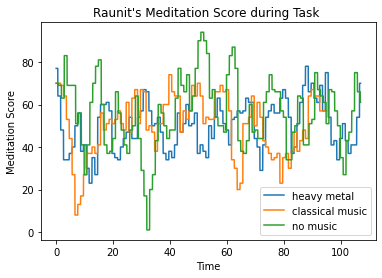

In [43]:
axes_R_task = plt.gca()
df_R.plot(kind = 'line', x='Time',y= 'R_Task Meditation: HM', ax = axes_R_task, label = 'heavy metal')
df_R.plot(kind = 'line', x='Time',y= 'R_Task Meditation: C', ax = axes_R_task, label = 'classical music')
df_R.plot(kind = 'line', x='Time',y= 'R_Task Meditation: NM', ax = axes_R_task, label = 'no music')
plt.title("Raunit's Meditation Score during Task ")
plt.ylabel("Meditation Score")

Text(0, 0.5, 'Meditation Score')

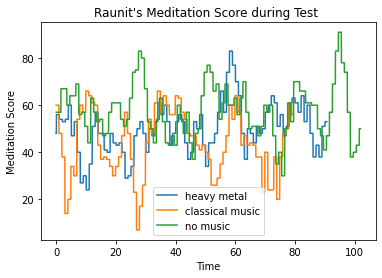

In [44]:
axes_R_test = plt.gca()
df_R.plot(kind = 'line', x='Time',y= 'R_Test Meditation: HM', ax = axes_R_test, label = 'heavy metal')
df_R.plot(kind = 'line', x='Time',y= 'R_Test Meditation: C', ax = axes_R_test, label = 'classical music')
df_R.plot(kind = 'line', x='Time',y= 'R_Test Meditation: NM', ax = axes_R_test, label = 'no music')
plt.title("Raunit's Meditation Score during Test ")
plt.ylabel("Meditation Score")

## Overall Analysis and Data Visualization

In [45]:
df = pd.concat([df_AL,df_AN, df_B, df_G, df_K, df_M, df_RL, df_R],axis=1)
df = df.loc[:, ~df.columns.duplicated()]
df = df.dropna(subset = ['Time'])
df

,Time,AL_Task Meditation: C,AL_Task Meditation: HM,AL_Task Meditation: NM,AL_Test Meditation: C,AL_Test Meditation: HM,AL_Test Meditation: NM,AN_Task Meditation: C,AN_Task Meditation: HM,AN_Test Meditation: C,...,RL_Task Meditation: NM,RL_Test Meditation: HM,RL_Test Meditation: C,RL_Test Meditation: NM,R_Task Meditation: HM,R_Task Meditation: C,R_Task Meditation: NM,R_Test Meditation: HM,R_Test Meditation: C,R_Test Meditation: NM
0,0.000000,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,91.0,41.0,29.0,37.0,77.0,70.0,70.0,48.0,60.0,57.0
1,0.001953,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,91.0,41.0,29.0,37.0,77.0,70.0,70.0,48.0,60.0,57.0
2,0.003906,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,91.0,41.0,29.0,37.0,77.0,70.0,70.0,48.0,60.0,57.0
3,0.005859,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,91.0,41.0,29.0,37.0,77.0,70.0,70.0,48.0,60.0,57.0
4,0.007812,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,91.0,41.0,29.0,37.0,77.0,70.0,70.0,48.0,60.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55227,107.865234,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
55228,107.867188,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
55229,107.869141,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN
55230,107.871094,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN


In [46]:
df['avg_test_HM'] = df[['AL_Test Meditation: HM','AN_Test Meditation: HM','B_Test Meditation: HM','G_Test Meditation: HM','M_Test Meditation: HM','K_Test Meditation: HM','R_Test Meditation: HM','RL_Test Meditation: HM']].mean(axis=1)
df['avg_task_HM'] = df[['AL_Task Meditation: HM','AN_Task Meditation: HM','B_Task Meditation: HM','G_Task Meditation: HM','M_Task Meditation: HM','K_Task Meditation: HM','R_Task Meditation: HM','RL_Task Meditation: HM']].mean(axis=1)
df['avg_test_C'] = df[['AL_Test Meditation: C','AN_Test Meditation: C','B_Test Meditation: C','G_Test Meditation: C','M_Test Meditation: C','K_Test Meditation: C','R_Test Meditation: C','RL_Test Meditation: C']].mean(axis=1)
df['avg_task_C'] = df[['AL_Task Meditation: C','AN_Task Meditation: C','B_Task Meditation: C','G_Task Meditation: C','M_Task Meditation: C','K_Task Meditation: C','R_Task Meditation: C','RL_Task Meditation: C']].mean(axis=1)
df['avg_test_NM'] = df[['AL_Test Meditation: NM','AN_Test Meditation: NM','B_Test Meditation: NM','G_Test Meditation: NM','M_Test Meditation: NM','K_Test Meditation: NM','R_Test Meditation: NM','RL_Test Meditation: NM']].mean(axis=1)
df['avg_task_NM'] = df[['AL_Task Meditation: NM','B_Task Meditation: NM','G_Task Meditation: NM','M_Task Meditation: NM','K_Task Meditation: NM','R_Task Meditation: NM','RL_Task Meditation: NM']].mean(axis=1)
df['avg_task_word'] = df[['AL_Task Meditation: NM','AL_Task Meditation: C','AL_Task Meditation: HM','M_Task Meditation: C','M_Task Meditation: HM','M_Task Meditation: NM','K_Task Meditation: C','K_Task Meditation: HM','K_Task Meditation: NM','R_Task Meditation: C','R_Task Meditation: HM','R_Task Meditation: NM']].mean(axis=1)
df['avg_task_img'] = df[['AN_Task Meditation: C','AN_Task Meditation: HM','B_Task Meditation: C','B_Task Meditation: HM','B_Task Meditation: NM','G_Task Meditation: C','G_Task Meditation: HM','G_Task Meditation: NM','RL_Task Meditation: C','RL_Task Meditation: HM','RL_Task Meditation: NM']].mean(axis=1)
df['avg_test_word'] = df[['AL_Test Meditation: NM','AL_Test Meditation: C','AL_Test Meditation: HM','M_Test Meditation: C','M_Test Meditation: HM','M_Test Meditation: NM','K_Test Meditation: C','K_Test Meditation: HM','K_Test Meditation: NM','R_Test Meditation: C','R_Test Meditation: HM','R_Test Meditation: NM']].mean(axis=1)
df['avg_test_img'] = df[['AN_Test Meditation: NM','AN_Test Meditation: C','AN_Test Meditation: HM','B_Test Meditation: C','B_Test Meditation: HM','B_Test Meditation: NM','G_Test Meditation: C','G_Test Meditation: HM','G_Test Meditation: NM','RL_Test Meditation: C','RL_Test Meditation: HM','RL_Test Meditation: NM']].mean(axis=1)
df

,Time,AL_Task Meditation: C,AL_Task Meditation: HM,AL_Task Meditation: NM,AL_Test Meditation: C,AL_Test Meditation: HM,AL_Test Meditation: NM,AN_Task Meditation: C,AN_Task Meditation: HM,AN_Test Meditation: C,...,avg_test_HM,avg_task_HM,avg_test_C,avg_task_C,avg_test_NM,avg_task_NM,avg_task_word,avg_task_img,avg_test_word,avg_test_img
0,0.000000,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,47.125,48.75,58.125,48.0,48.0,59.571429,56.666667,46.454545,56.583333,45.583333
1,0.001953,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,47.125,48.75,58.125,48.0,48.0,59.571429,56.666667,46.454545,56.583333,45.583333
2,0.003906,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,47.125,48.75,58.125,48.0,48.0,59.571429,56.666667,46.454545,56.583333,45.583333
3,0.005859,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,47.125,48.75,58.125,48.0,48.0,59.571429,56.666667,46.454545,56.583333,45.583333
4,0.007812,41.0,94.0,50.0,48.0,64.0,81.0,40.0,61.0,61.0,...,47.125,48.75,58.125,48.0,48.0,59.571429,56.666667,46.454545,56.583333,45.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55227,107.865234,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.000,NaN,57.000,55.0,65.5,55.250000,64.200000,46.000000,77.000000,62.000000
55228,107.867188,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.000,NaN,57.000,55.0,65.5,55.250000,64.200000,46.000000,77.000000,62.000000
55229,107.869141,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.000,NaN,57.000,55.0,65.5,55.250000,64.200000,46.000000,77.000000,62.000000
55230,107.871094,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.000,NaN,57.000,55.0,65.5,55.250000,64.200000,46.000000,77.000000,62.000000


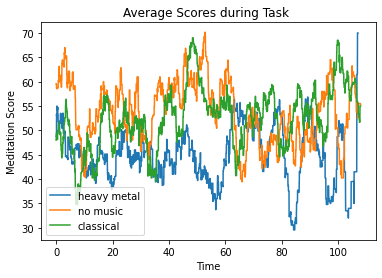

In [47]:
axs_avg_task = plt.gca()
df.plot(kind = 'line', x='Time',y= 'avg_task_HM', ax = axs_avg_task, label = 'heavy metal')
df.plot(kind = 'line', x='Time',y= 'avg_task_NM', ax = axs_avg_task, label = 'no music')
df.plot(kind = 'line', x='Time',y= 'avg_task_C', ax = axs_avg_task, label = 'classical')
plt.title("Average Scores during Task ")
plt.ylabel("Meditation Score")
plt.savefig('Avg_Scores_Task')

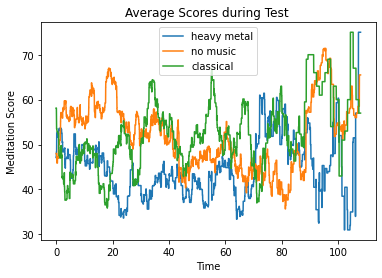

In [48]:
axs_avg_test = plt.gca()
df.plot(kind = 'line', x='Time',y= 'avg_test_HM', ax = axs_avg_test, label = 'heavy metal')
df.plot(kind = 'line', x='Time',y= 'avg_test_NM', ax = axs_avg_test, label = 'no music')
df.plot(kind = 'line', x='Time',y= 'avg_test_C', ax = axs_avg_test, label = 'classical')
plt.title("Average Scores during Test ")
plt.ylabel("Meditation Score")
plt.savefig('Avg_Scores_Test')

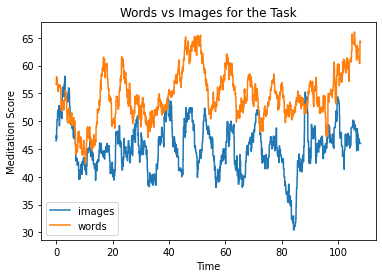

In [49]:
axs_wordimg_task = plt.gca()
df.plot(kind = 'line', x='Time',y= 'avg_task_img', ax = axs_wordimg_task, label = 'images')
df.plot(kind = 'line', x='Time',y= 'avg_task_word', ax = axs_wordimg_task, label = 'words')
plt.title("Words vs Images for the Task")
plt.ylabel("Meditation Score")
plt.savefig('WordsvsImages_Task')


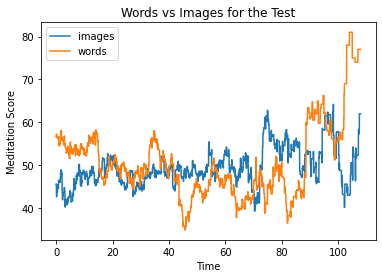

In [50]:
axs_wordimg_test = plt.gca()
df.plot(kind = 'line', x='Time',y= 'avg_test_img', ax = axs_wordimg_test, label = 'images')
df.plot(kind = 'line', x='Time',y= 'avg_test_word', ax = axs_wordimg_test, label = 'words')
plt.title("Words vs Images for the Test")
plt.ylabel("Meditation Score")
plt.savefig('WordsvsImages_Test')


In [51]:
#loading in the accuracy scores for the tests
test_results = pd.read_csv('test_accuracies.csv')
test_results

,Participant,No Music,Heavy Metal,Classical,Task
0,Manny,0.5,0.6,0.9,Word
1,Kassie,0.7,0.2,0.5,Word
2,Raunit,0.7,0.8,1.0,Word
3,Alina,0.7,0.8,0.8,Word
4,Blake,0.7,0.9,0.8,Image
5,Andrea,1.0,0.3,0.9,Image
6,Rachel,1.0,1.0,1.0,Image
7,George,0.9,0.7,0.3,Image


In [52]:
med_avg_NM= df[['M_Test Meditation: NM',"K_Test Meditation: NM","R_Test Meditation: NM","AL_Test Meditation: NM","B_Test Meditation: NM","AN_Test Meditation: NM","RL_Test Meditation: NM","G_Test Meditation: NM"]].mean().values.tolist()
med_avg_HM = df[['M_Test Meditation: HM',"K_Test Meditation: HM","R_Test Meditation: HM","AL_Test Meditation: HM","B_Test Meditation: HM","AN_Test Meditation: HM","RL_Test Meditation: HM","G_Test Meditation: HM"]].mean().values.tolist()
med_avg_C = df[['M_Test Meditation: C',"K_Test Meditation: C","R_Test Meditation: C","AL_Test Meditation: C","B_Test Meditation: C","AN_Test Meditation: C","RL_Test Meditation: C","G_Test Meditation: C"]].mean().values.tolist()
test_results['Avg Meditation: NM'] = med_avg_NM
test_results['Avg Meditation: HM'] = med_avg_HM
test_results['Avg Meditation: C'] = med_avg_C
test_results


,Participant,No Music,Heavy Metal,Classical,Task,Avg Meditation: NM,Avg Meditation: HM,Avg Meditation: C
0,Manny,0.5,0.6,0.9,Word,55.190270,58.855362,49.511575
1,Kassie,0.7,0.2,0.5,Word,40.222763,55.999845,50.177135
2,Raunit,0.7,0.8,1.0,Word,57.587489,50.041351,43.982410
3,Alina,0.7,0.8,0.8,Word,43.444136,10.337754,57.842287
4,Blake,0.7,0.9,0.8,Image,54.642820,40.494343,57.097452
5,Andrea,1.0,0.3,0.9,Image,34.799181,50.200114,29.639925
6,Rachel,1.0,1.0,1.0,Image,65.003342,43.341762,39.807707
7,George,0.9,0.7,0.3,Image,58.578216,37.402882,54.286211


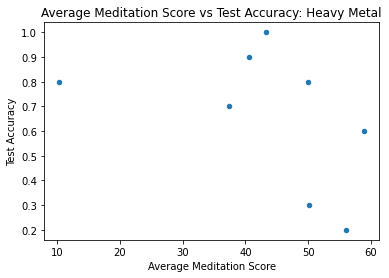

In [53]:
ax_HM = test_results.plot.scatter(x='Avg Meditation: HM',y='Heavy Metal')
plt.xlabel("Average Meditation Score")
plt.ylabel('Test Accuracy')
plt.title("Average Meditation Score vs Test Accuracy: Heavy Metal")
plt.savefig('MedScorevTestScore_HM')

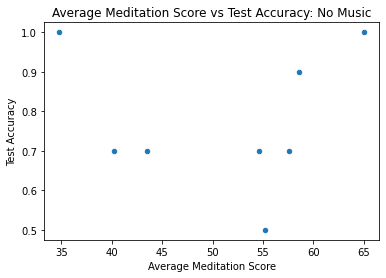

In [54]:
ax_NM = test_results.plot.scatter(x='Avg Meditation: NM',y='No Music')
plt.xlabel("Average Meditation Score")
plt.ylabel('Test Accuracy')
plt.title("Average Meditation Score vs Test Accuracy: No Music")
plt.savefig('MedScorevTestScore_NM')

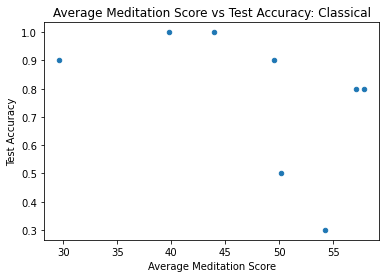

In [55]:
ax_C = test_results.plot.scatter(x='Avg Meditation: C',y='Classical')
plt.xlabel("Average Meditation Score")
plt.ylabel('Test Accuracy')
plt.title("Average Meditation Score vs Test Accuracy: Classical")
plt.savefig('MedScorevTestScore_C')

In [56]:
test_results

,Participant,No Music,Heavy Metal,Classical,Task,Avg Meditation: NM,Avg Meditation: HM,Avg Meditation: C
0,Manny,0.5,0.6,0.9,Word,55.190270,58.855362,49.511575
1,Kassie,0.7,0.2,0.5,Word,40.222763,55.999845,50.177135
2,Raunit,0.7,0.8,1.0,Word,57.587489,50.041351,43.982410
3,Alina,0.7,0.8,0.8,Word,43.444136,10.337754,57.842287
4,Blake,0.7,0.9,0.8,Image,54.642820,40.494343,57.097452
5,Andrea,1.0,0.3,0.9,Image,34.799181,50.200114,29.639925
6,Rachel,1.0,1.0,1.0,Image,65.003342,43.341762,39.807707
7,George,0.9,0.7,0.3,Image,58.578216,37.402882,54.286211


In [114]:
test_results.to_csv("accuracy_meditation_scores.csv", sep=',', encoding='utf-8')